# Домашняя работа №7 (Курс "Advanced Python")
## ФИО: Волков Сергей Андреевич

**Тема:** Итераторы и генераторы  
**Выдана:** 22 октября  
**Мягкий дедлайн:** 29 октября  
**Жесткий дедлайн:** 5 ноября  

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

### Задача 1: генератор степеней числа по модулю n (1 балл)
Напишите генератор powers_mod(x, n), который будет генерировать последовательность чисел $x^0 (\!\!\!\!\mod n), x^1 (\!\!\!\!\mod n), x^2 (\!\!\!\!\mod n), \ldots$, пока очередная степень не будет равна 1. 

In [1]:
#ваш код здесь
def powers_mod(x, n):
    i = 0
    while True:
        number = (x ** i) % n
        yield number
        if number == 1 and i > 0:
            break
        i += 1

In [2]:
for i in powers_mod(3, 7):
    print(i, end=' ')

1 3 2 6 4 5 1 

### Задача 2: биномиальные коэффициенты (2 балла)
Напишите генератор binom_coeffs(n), генерирующий последовательность биномиальных коэффициентов $C_n^0, C_n^1, \ldots, C_n^n$, **без использования факторалов** (т.е вычислять текущее значение на основе предыдущего). Если никак не удается придумать формулу, то погуглите ее. Она есть даже на Википедии ;)

In [3]:
#ваш код здесь
def binom_coeffs(n):
    cur_val = 1
    k = 0
    while True:
        yield cur_val
        cur_val *= (n - k) / (k + 1) 
        if cur_val == 0: 
            break
        k += 1

In [5]:
for i in range(0, 7):  # треугольник Паскаля
    for coef in binom_coeffs(i):
        print(int(coef), end=' ')
    print()

1 
1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
1 5 10 10 5 1 
1 6 15 20 15 6 1 


### Задача 3: денежные потоки (1 балл)
Пользуясь библиотекой itertools, напишите генератор calc_budget(iterable), который по входящей последовательности ежедневных доходов (положительные значения) или расходов (отрицательные) возвращает поседовательность доступных средств (отрицательные значения, если расходов больше доходов на данный день) на каждый из дней. Например: calc_budget([20, -5, -5, 10, -40, 10, 10, 100, -30]) $\to$ 20, 15, 10, 20, -20, -10, 0, 100, 70

In [6]:
#ваш код здесь
import itertools


def calc_budget(iterable):
    return itertools.accumulate(iterable)

In [7]:
for i in calc_budget([20, -5, -5, 10, -40, 10, 10, 100, -30]):
    print(i, end=' ')

20 15 10 20 -20 -10 0 100 70 

### Задача 4: закупки зоопарка (2 балла)
Пользуясь библиотекой itertools (при помощи groupby), напишите функцию, которая по входящему списку кортежей вида (животное, вид еды, потребеление еды в кг за месяц) будет вычислять, сколько различной еды необходимо закупить зоопарку на месяц. Например:
```python3
        costs = [("Тигр", "мясо", 30),
                 ("Тигр", "вода", 120),
                 ("Тигр", "яйца", 5),
                 ("Змея", "яйца", 3),
                 ("Змея", "вода", 10),
                 ("Антилопа", "трава", 100),
                 ("Антилопа", "вода", 100)
                ]
        #calc_food(costs) вернет {"мясо":30, "вода":230, "яйца":8, "трава": 100}
```

In [8]:
#ваш код здесь
def calc_food(iterable):
    costs = dict()
    for food, group in itertools.groupby(iterable, key=lambda x: x[1]):
        for animal in group:
            try:
                costs[food] += animal[2]
            except KeyError:
                costs[food] = animal[2]
    return costs

In [9]:
costs = [
    ("Тигр", "мясо", 30),
    ("Тигр", "вода", 120),
    ("Тигр", "яйца", 5),
    ("Змея", "яйца", 3),
    ("Змея", "вода", 10),
    ("Антилопа", "трава", 100),
    ("Антилопа", "вода", 100)
]
calc_food(costs)

{'мясо': 30, 'вода': 230, 'яйца': 8, 'трава': 100}

### Задача 5: датасет изображений (3 балла)
Напишите генератор urlImgs(links), который будет генерировать последовательность изображений, скачанных по ссылкам из переданного списка links. Возможно, вам понадобятся модули requests, PIL и io

In [59]:
import requests
from PIL import Image
from io import BytesIO


#реализуйте генератор
def urlImgs(links):
    for link in links:
        # пример брал отсюда https://requests.readthedocs.io/en/master/user/quickstart/ - Binary Response Content
        responce = requests.get(link)  # responce.content - битовый объект, преобразуем его к типу изображение
#         print(BytesIO(responce.content))
        image = Image.open(BytesIO(responce.content))
#         print(image)
        yield image

Проиллюстрируйте работу вашего генератора выполнением ячеек ниже

In [60]:
%pylab inline
def return_size(total):
    """Возвращает размеры X и Y - сколько изображений будет на итоговой картинке вывода"""
    pos_sizes = [2,3]
    size_x = max(pos_sizes)
    for size in reversed(pos_sizes):
        if total % size == 0:
            size_x = size
            break
    
    size_y = math.ceil(total / size_x)
    return size_x, size_y

def plot_all_images(images):
    if not images:
        return
    
    n_images = len(images)
    fig = plt.figure(figsize=(22,10))
    size_y, size_x = return_size(n_images)
    
    for i, image in enumerate(images):
        plt.subplot(size_x, size_y, i+1)
        plt.imshow(image)

Populating the interactive namespace from numpy and matplotlib


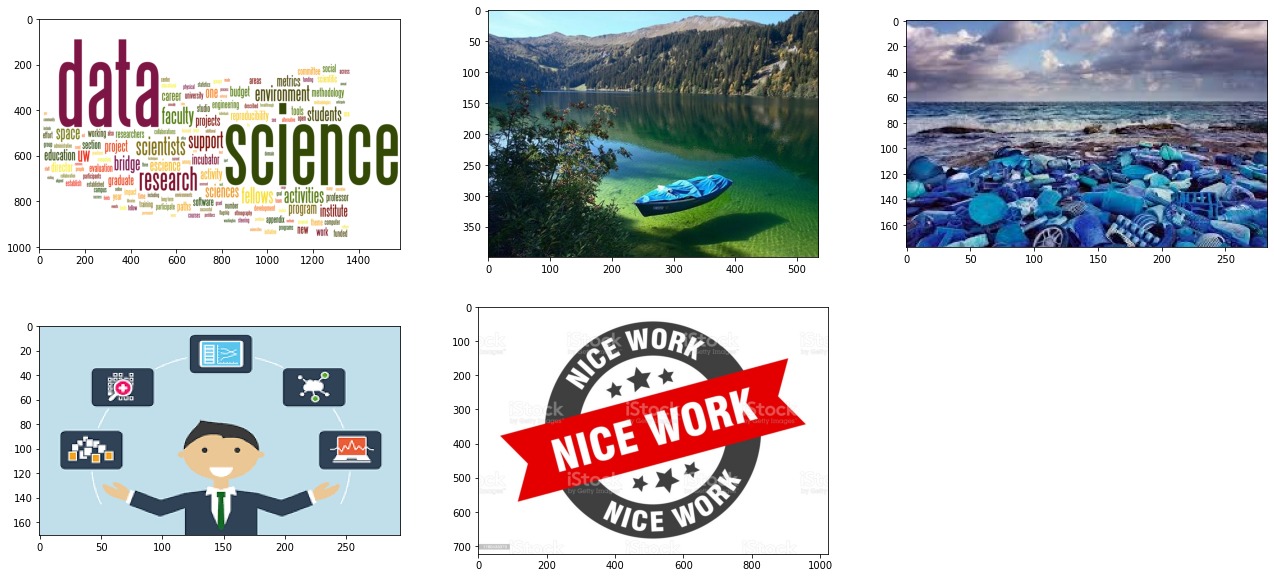

In [61]:
links = ["https://plyus.pw/wp-content/uploads/2020/10/gen1.png",
      "https://plyus.pw/wp-content/uploads/2020/10/gen2.jpg",
      "https://plyus.pw/wp-content/uploads/2020/10/gen3.jpg",
      "https://plyus.pw/wp-content/uploads/2020/10/gen4.png",
      "https://plyus.pw/wp-content/uploads/2020/10/gen5.jpg"]
plot_all_images(list(urlImgs(links)))

### Задача 6: остановка генератора (1 балл)
Создайте генератор, который генерирует числа Фибоначчи, пока в него не отправить сигнал StopIteration

In [12]:
#ваш код здесь
def fibonacciGenerator():
    first, second = 1, 1
    while True:
        try:
            yield first
        except StopIteration:
            yield 
            return
        first, second = second, first + second

In [22]:
gen = fibonacciGenerator()

In [23]:
for _ in range(10):
    print(next(gen))
gen.throw(StopIteration)

1
1
2
3
5
8
13
21
34
55
